In [7]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 13.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 14.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 14.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 5.9 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 6.2 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 5.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 3.8 MB/s eta 0:00:01
   -------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/mnt/data/sales_predictions_submission.csv"
df = pd.read_csv(r"C:\Users\SS\Downloads\sales_predictions_submission.csv")

# Display the first few rows to inspect the structure
df.head()
sales = df['sales']
time = df['id']



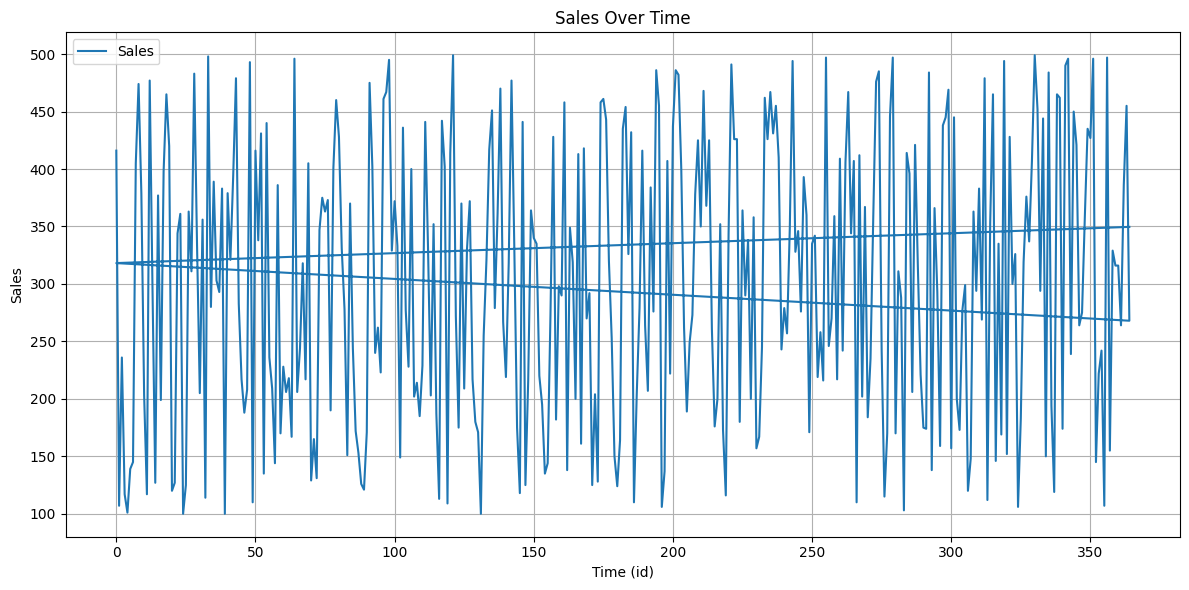

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(time, sales, label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Time (id)')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
train_size = int(len(sales) * 0.8)
train, test = sales[:train_size], sales[train_size:]


In [15]:
arima_model = ARIMA(train, order=(5, 1, 0))  # You can tune this
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

# =========================
# Exponential Smoothing (ETS)
# =========================
ets_model = ExponentialSmoothing(train, trend='add', seasonal=None)
ets_result = ets_model.fit()
ets_forecast = ets_result.forecast(len(test))
ets_mae = mean_absolute_error(test, ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))


Model Performance Metrics:

ARIMA     -> MAE: 6.51, RMSE: 7.46
ETS       -> MAE: 0.0008, RMSE: 0.0009
RandomForest -> MAE: 19.60, RMSE: 21.54


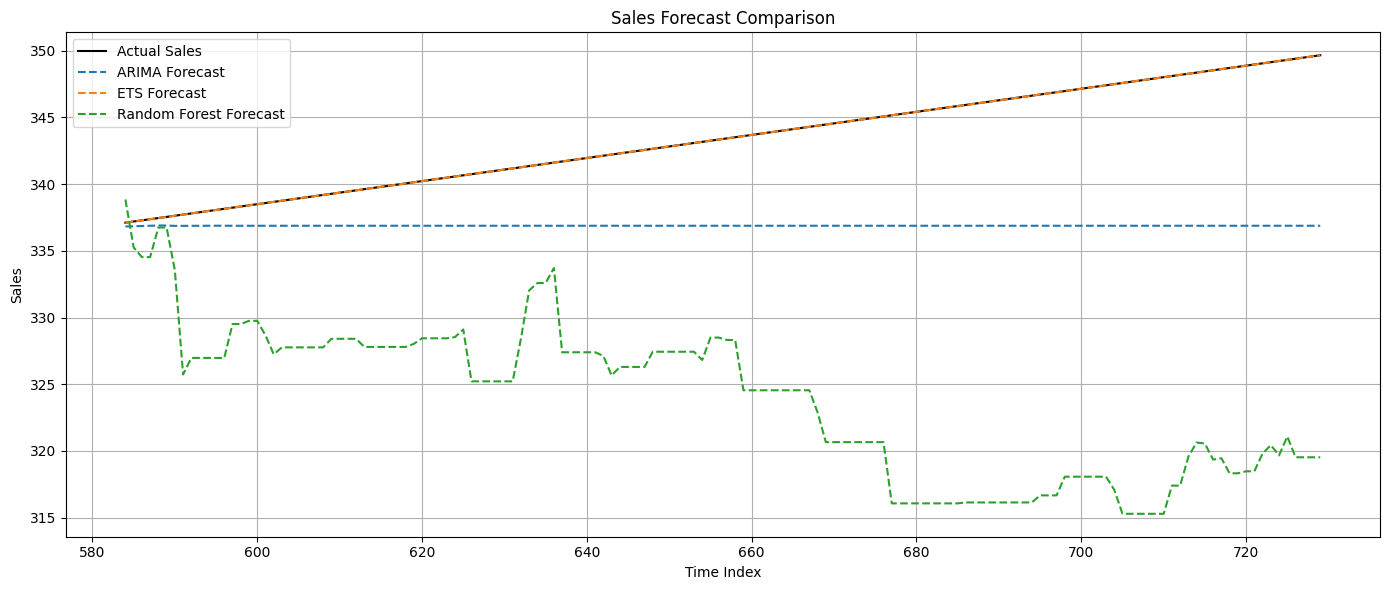

In [16]:
# Random Forest Regressor
# =========================
def create_lag_features(series, lags=5):
    df_lag = pd.DataFrame({'sales': series})
    for lag in range(1, lags + 1):
        df_lag[f'lag_{lag}'] = df_lag['sales'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

lags = 5
df_lagged = create_lag_features(sales, lags)
X = df_lagged.drop(columns='sales')
y = df_lagged['sales']

X_train = X[:train_size - lags]
X_test = X[train_size - lags:]
y_train = y[:train_size - lags]
y_test = y[train_size - lags:]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_forecast = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_forecast)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_forecast))

# =========================
# Print Metrics
# =========================
print("Model Performance Metrics:\n")
print(f"ARIMA     -> MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")
print(f"ETS       -> MAE: {ets_mae:.4f}, RMSE: {ets_rmse:.4f}")
print(f"RandomForest -> MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

# =========================
# Forecast Plot
# =========================
plt.figure(figsize=(14, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, ets_forecast, label='ETS Forecast', linestyle='--')
plt.plot(y_test.index, rf_forecast, label='Random Forest Forecast', linestyle='--')

plt.title('Sales Forecast Comparison')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
